Facial Emotion detection using Deep Learning Model

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from matplotlib import pyplot as plt
import numpy as np
import os
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns
import random

In [2]:
import numpy as np   #i added this part at last so if u run it u might slight variation on result
import tensorflow as tf
import random

# Set seeds for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

In [3]:
IMG_HEIGHT = 48
IMG_WIDTH = 48
batch_size = 32


In [4]:
train_data_dir = 'train'
validation_data_dir = 'test'

In [5]:
# Updated Learning Rate Scheduling for 100 epochs
def lr_schedule(epoch):
    initial_lr = 0.001
    if epoch < 30:
        return initial_lr
    elif 30 <= epoch < 60:
        return initial_lr * 0.1
    elif 60 <= epoch < 90:
        return initial_lr * 0.01
    else:
        return initial_lr * 0.001


In [6]:
# Step 2: Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [7]:
# Step 3: Model Evaluation Metrics
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

In [8]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [9]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    color_mode='grayscale',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 28709 images belonging to 7 classes.


In [11]:
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    color_mode='grayscale',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 7178 images belonging to 7 classes.


In [12]:
# Analyze class distribution in training and testing sets
train_class_counts = [len(os.listdir(os.path.join(train_data_dir, emotion))) for emotion in os.listdir(train_data_dir)]
test_class_counts = [len(os.listdir(os.path.join(validation_data_dir, emotion))) for emotion in os.listdir(validation_data_dir)]

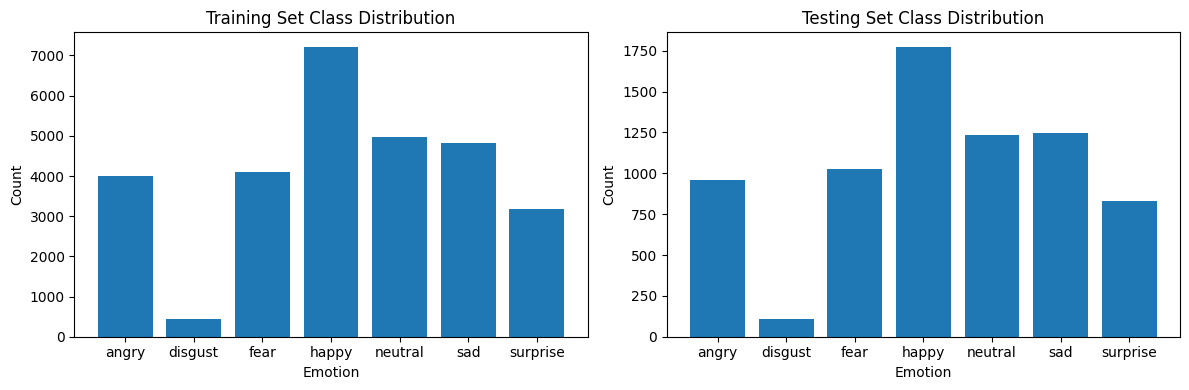

In [13]:
# Visualize class distribution
plt.figure(figsize=(12, 4))

# Plot Training Set Class Distribution
plt.subplot(1, 2, 1)
plt.bar(os.listdir(train_data_dir), train_class_counts)
plt.title('Training Set Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')

# Plot Testing Set Class Distribution
plt.subplot(1, 2, 2)
plt.bar(os.listdir(validation_data_dir), test_class_counts)
plt.title('Testing Set Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


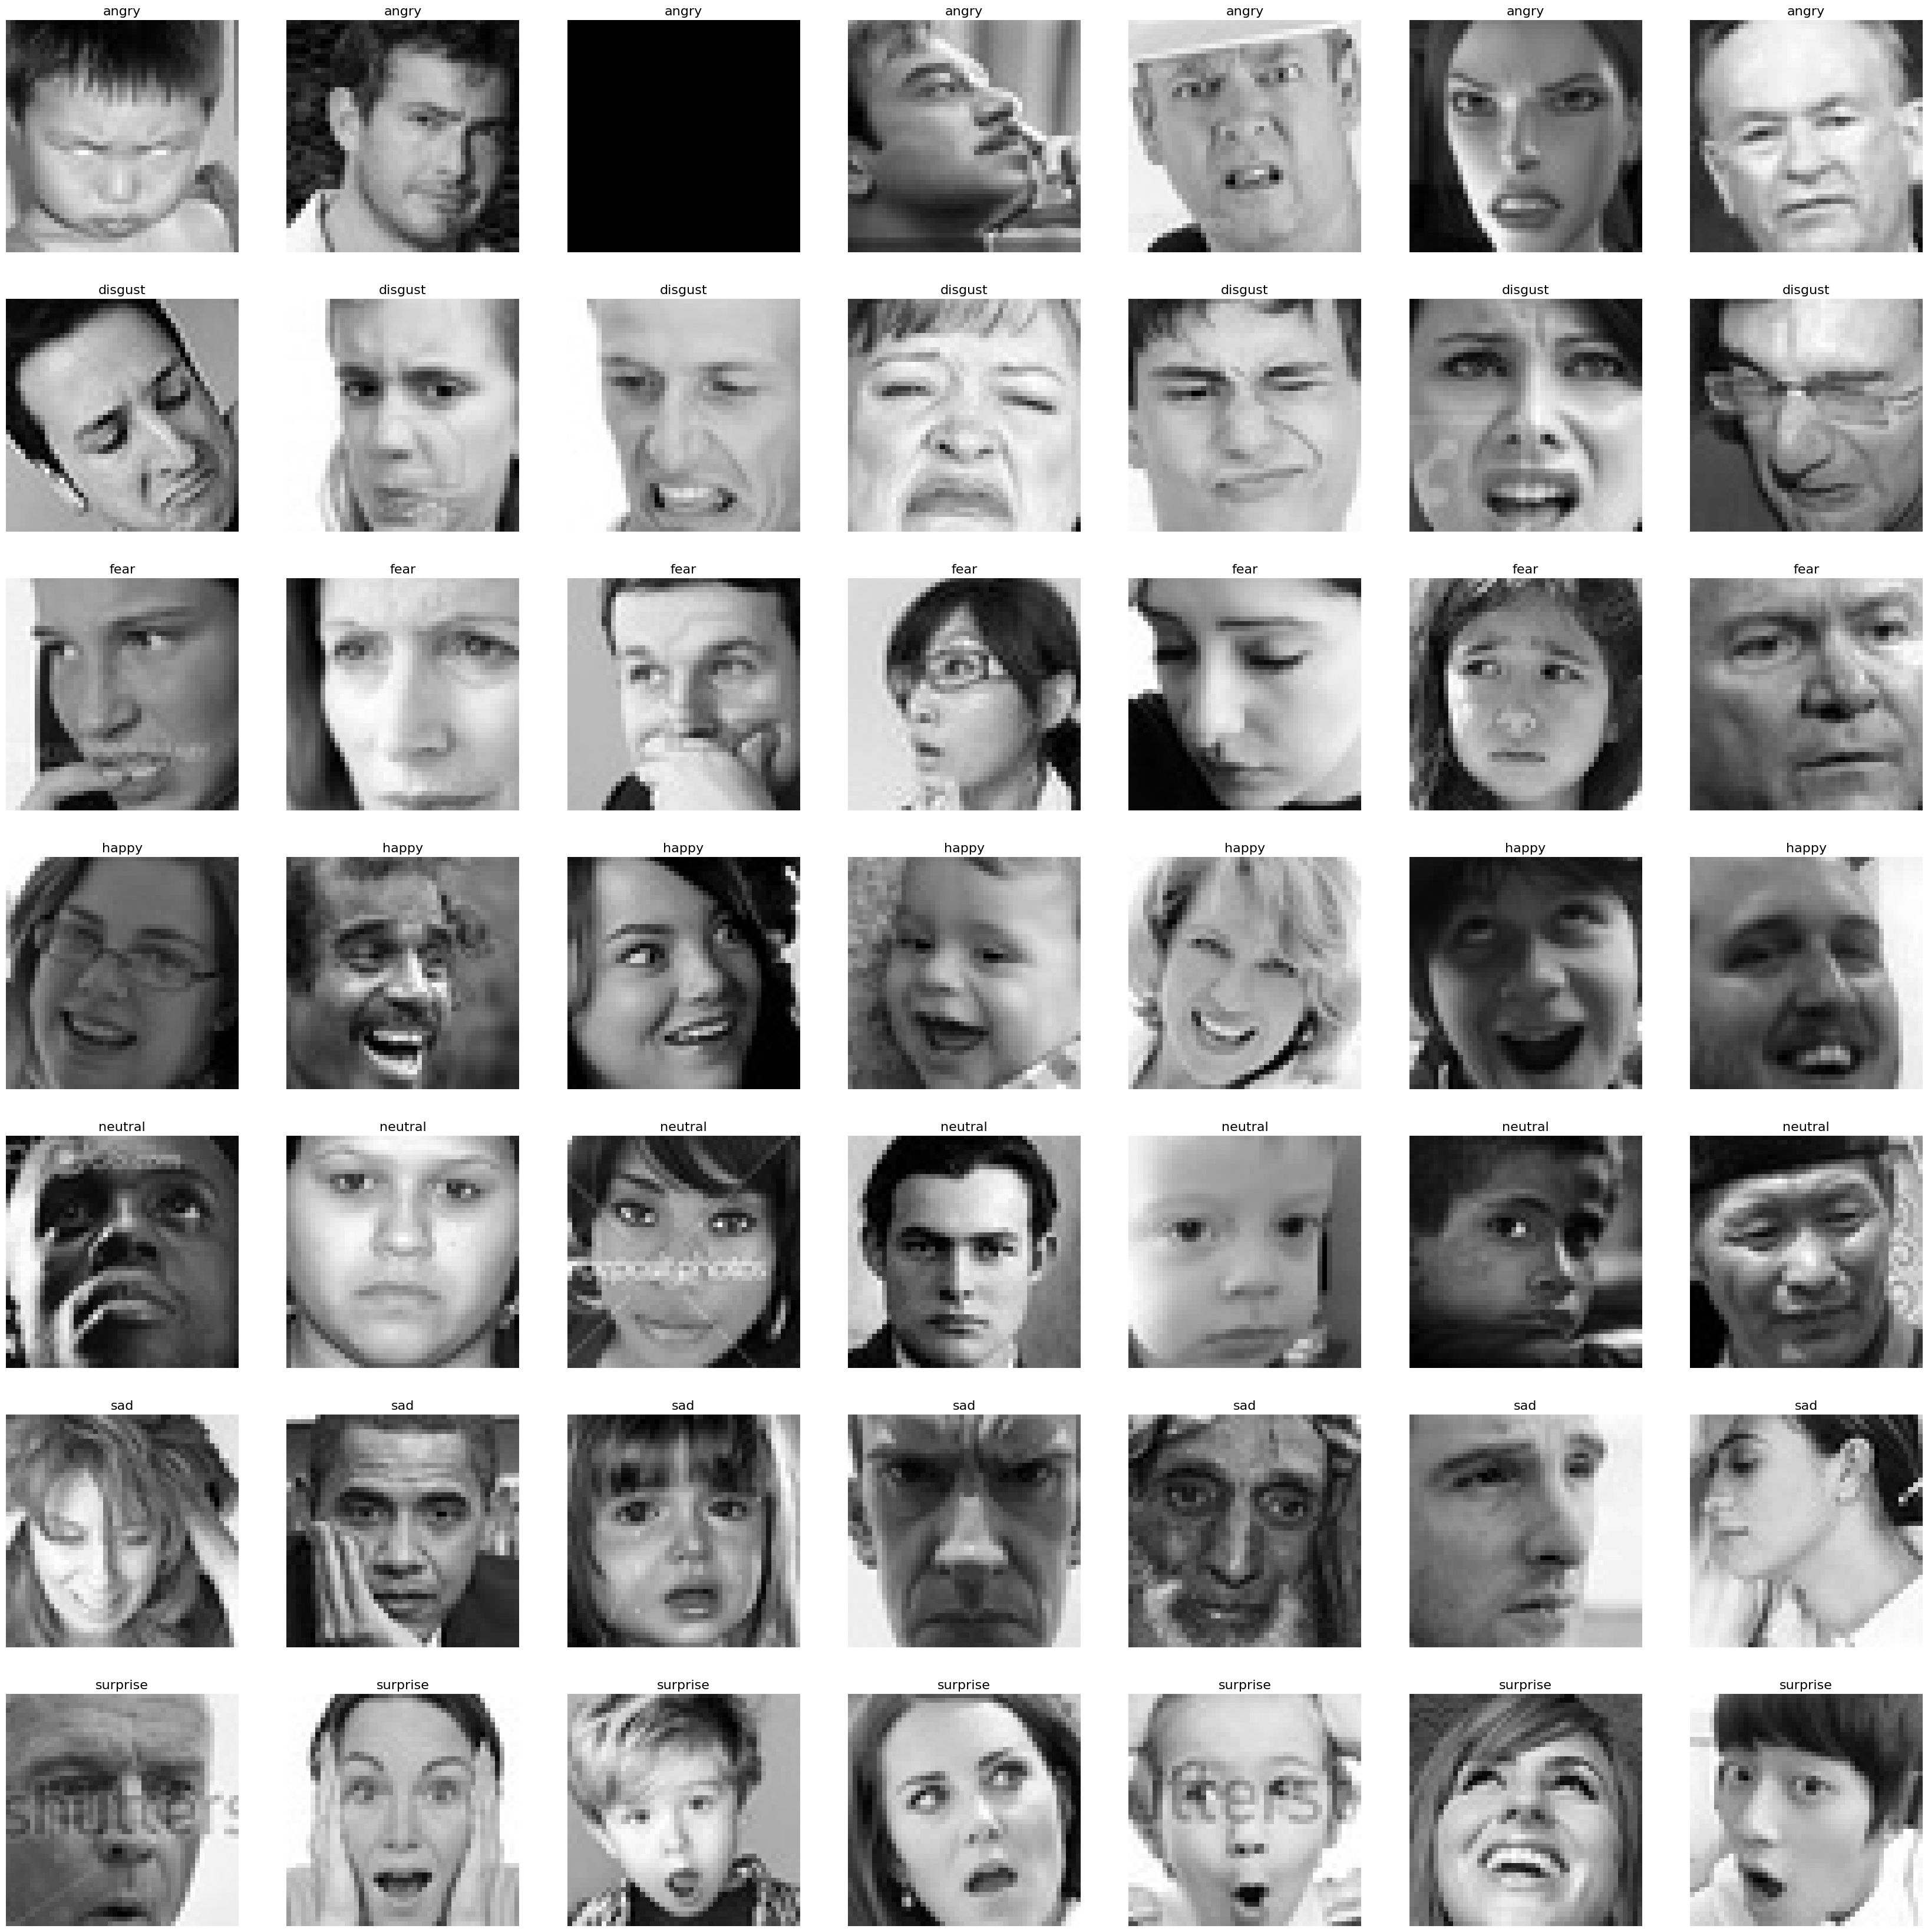

In [14]:
import cv2
import os
import matplotlib.pyplot as plt

def display_example_images(image_dir, num_images_per_emotion=7, image_size=(6, 6), label_fontsize=16):
    num_emotions = len(os.listdir(image_dir))
    plt.figure(figsize=(image_size[0] * num_images_per_emotion, image_size[1] * num_emotions))
    
    for i, emotion_folder in enumerate(os.listdir(image_dir)):
        emotion_path = os.path.join(image_dir, emotion_folder)
        images = os.listdir(emotion_path)[:num_images_per_emotion]
        
        for j, image in enumerate(images):
            plt.subplot(num_emotions, num_images_per_emotion, i * num_images_per_emotion + j + 1)
            img = cv2.imread(os.path.join(emotion_path, image), cv2.IMREAD_GRAYSCALE)
            plt.imshow(img, cmap='gray')
            plt.title(emotion_folder, fontsize=label_fontsize)  # Increase font size
            plt.axis('off')

# Display 7 example images for each emotion from the training set
display_example_images(train_data_dir, num_images_per_emotion=7, image_size=(6, 6), label_fontsize=16)
plt.show()

# Display 7 example images for each emotion from the testing set
#display_example_images(validation_data_dir, num_images_per_emotion=7, image_size=(6, 6), label_fontsize=16)
#plt.show()



In [15]:
import random

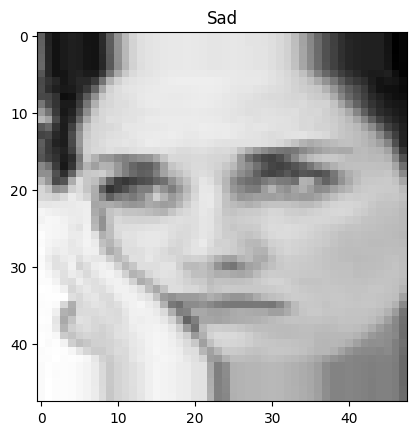

In [16]:
# Verify the generator by plotting a few faces and printing corresponding labels
img, label = train_generator.__next__()
i = random.randint(0, (img.shape[0])-1)
image = img[i]
labl = class_labels[label[i].argmax()]
plt.imshow(image[:, :, 0], cmap='gray')
plt.title(labl)
plt.show()

In [17]:
# Model Architecture
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

In [18]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

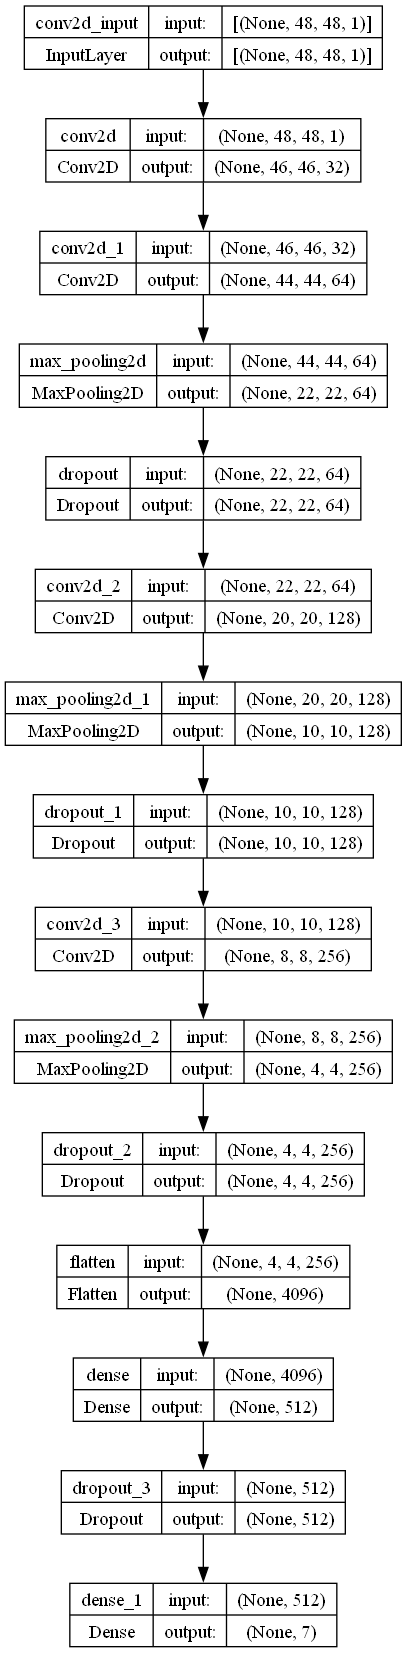

In [21]:
# Visualize the CNN architecture
from keras.utils import plot_model
plot_model(model, to_file='cnn_architecturee.png', show_shapes=True, dpi=96, show_layer_names=True)

In [22]:
# Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [23]:
# Paths
train_path = "train"
test_path = "test"

In [24]:
num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)

In [25]:
num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)


In [26]:
# Train the model with callbacks
history = model.fit(
    train_generator,
    steps_per_epoch=num_train_imgs // batch_size,
    epochs=2,
    validation_data=validation_generator,
    validation_steps=num_test_imgs // batch_size,
    callbacks=[LearningRateScheduler(lr_schedule), early_stopping]
)

Epoch 1/2
897/897 [==============================] - 218s 241ms/step - loss: 1.7688 - accuracy: 0.2709 - val_loss: 1.6532 - val_accuracy: 0.3509 - lr: 0.0010
Epoch 2/2
897/897 [==============================] - 214s 239ms/step - loss: 1.6380 - accuracy: 0.3468 - val_loss: 1.4796 - val_accuracy: 0.4188 - lr: 0.0010


In [27]:
# Access Early Stopping information from history
if 'val_loss' in history.history:
    print(f"Best Validation Loss: {min(history.history['val_loss']):.4f} at epoch {history.history['val_loss'].index(min(history.history['val_loss'])) + 1}")
    print(f"Best Training Loss: {min(history.history['loss']):.4f} at epoch {history.history['loss'].index(min(history.history['loss'])) + 1}")

if 'val_accuracy' in history.history:
    print(f"Best Validation Accuracy: {max(history.history['val_accuracy']):.4f} at epoch {history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1}")
    print(f"Best Training Accuracy: {max(history.history['accuracy']):.4f} at epoch {history.history['accuracy'].index(max(history.history['accuracy'])) + 1}")

if 'lr' in history.history:
    print(f"Final Learning Rate: {history.history['lr'][-1]:.6f}")

Best Validation Loss: 1.4796 at epoch 2
Best Training Loss: 1.6380 at epoch 2
Best Validation Accuracy: 0.4188 at epoch 2
Best Training Accuracy: 0.3468 at epoch 2
Final Learning Rate: 0.001000


In [28]:
# Save the model
model.save('emotion_detection_model_epoch5.h5')

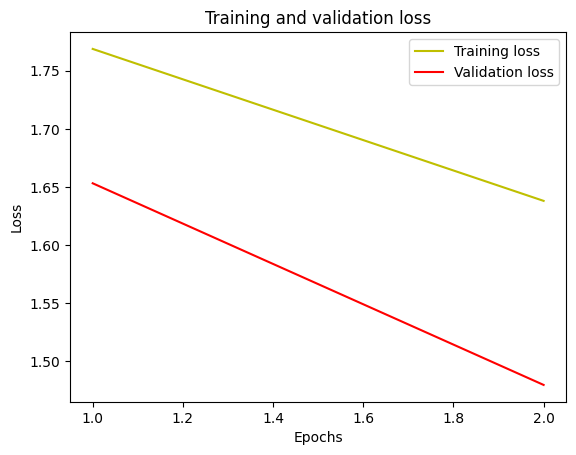

In [29]:
# Plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

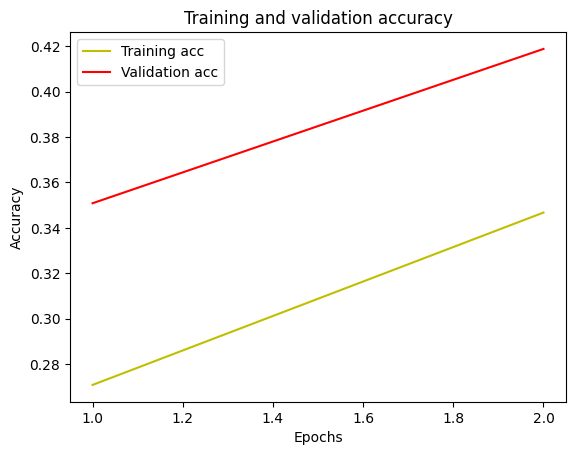

In [31]:
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [32]:
# Test the model
from keras.models import load_model

my_model = load_model('emotion_detection_model_epoch5.h5', compile=False)

In [33]:
# Generate a batch of images
test_img, test_lbl = validation_generator.__next__()
predictions = my_model.predict(test_img)
predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)

1/1 [==============================] - 0s 150ms/step


In [34]:
# Print Accuracy
print("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

Accuracy =  0.4375


<Axes: >

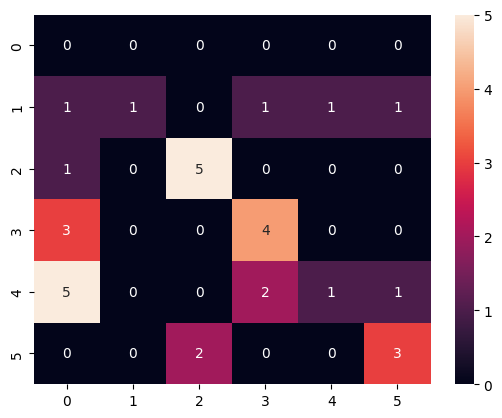

In [35]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, predictions)
sns.heatmap(cm, annot=True)


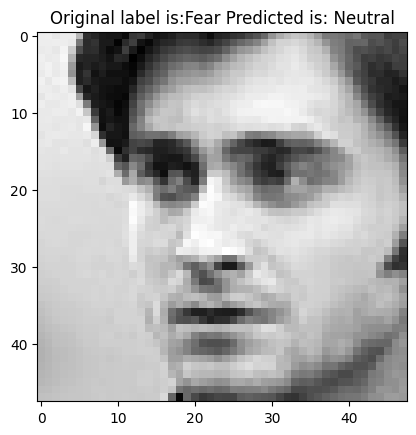

In [36]:
# Check results on a few select images
n = random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:, :, 0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+pred_labl)
plt.show()

In [37]:
import cv2
cap = cv2.VideoCapture(0)

In [38]:
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

In [39]:
import cv2
import numpy as np
from keras.models import load_model

In [40]:
# Load the pre-trained emotion detection model
emotion_model = load_model('emotion_detection_model_epoch5.h5')

In [41]:
# Create a face cascade classifier for face detection (you may need to adjust the path)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [42]:
# Initialize the webcam (you can specify a different video source if needed)
cap = cv2.VideoCapture(0)

In [44]:
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Extract the face region from the frame
        face = gray[y:y + h, x:x + w]

        # Resize the face image to match the model input size (48x48 pixels)
        face = cv2.resize(face, (48, 48))
        face = np.reshape(face, [1, 48, 48, 1])

        # Normalize the pixel values
        face = face / 255.0

        # Perform emotion prediction using the loaded model
        emotion_probabilities = emotion_model.predict(face)
        emotion_label = class_labels[np.argmax(emotion_probabilities)]

        # Draw a rectangle around the detected face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Display the predicted emotion label
        cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Display the frame with face detection and emotion prediction
    cv2.imshow('Emotion Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# Release the webcam and close OpenCV windows
cap.release()
cv2.destroyAllWindows()

In [45]:
## For Experiment stuff for projects

In [46]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from keras.models import load_model

In [47]:
# Load the pre-trained emotion detection model
my_model = load_model('emotion_detection_model_epoch5.h5')

In [48]:
# Assuming you have a validation generator for your test data
test_img, test_lbl = validation_generator.__next__()

In [49]:
# Generate predictions
predictions = my_model.predict(test_img)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_lbl, axis=1)

1/1 [==============================] - 0s 127ms/step


In [50]:
# 1. Accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.5000


In [51]:
# 2. Loss (assuming categorical crossentropy for simplicity)
loss = my_model.evaluate(test_img, test_lbl)[0]
print(f'Loss: {loss:.4f}')

1/1 [==============================] - 0s 205ms/step - loss: 1.2384 - accuracy: 0.5000
Loss: 1.2384


In [52]:
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']


In [53]:
# 3. Precision, Recall, F1 Score
classification_rep = classification_report(true_labels, predicted_labels, labels=np.arange(7), target_names=class_labels, zero_division=1)
print('Classification Report:\n', classification_rep)


Classification Report:
               precision    recall  f1-score   support

       Angry       0.33      0.40      0.36         5
     Disgust       1.00      1.00      1.00         0
        Fear       0.00      0.00      1.00         2
       Happy       0.80      0.89      0.84         9
     Neutral       0.29      0.50      0.36         4
         Sad       0.50      0.12      0.20         8
    Surprise       0.75      0.75      0.75         4

   micro avg       0.50      0.50      0.50        32
   macro avg       0.52      0.52      0.65        32
weighted avg       0.53      0.50      0.55        32



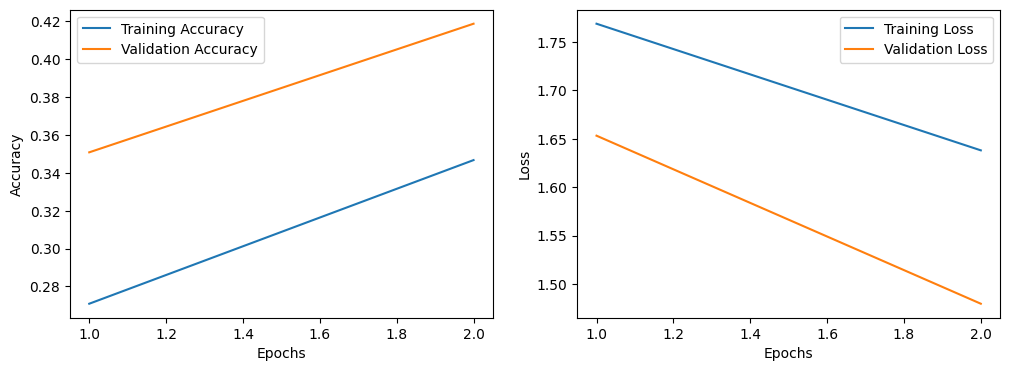

In [54]:
# 5. Learning Curve (plotting the training and validation accuracy and loss)
plt.figure(figsize=(12, 4))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [55]:
from sklearn.metrics import confusion_matrix

# Assuming 'true_labels' and 'predictions' are your true labels and predicted labels
cm = confusion_matrix(true_labels, predictions.argmax(axis=1))

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[2 1 2 0 0 0]
 [0 0 0 1 0 1]
 [1 0 8 0 0 0]
 [1 0 0 2 1 0]
 [2 1 0 4 1 0]
 [0 1 0 0 0 3]]


In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import plot_model
import matplotlib.pyplot as plt


In [57]:
# Create a simple CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(7, activation='softmax'))

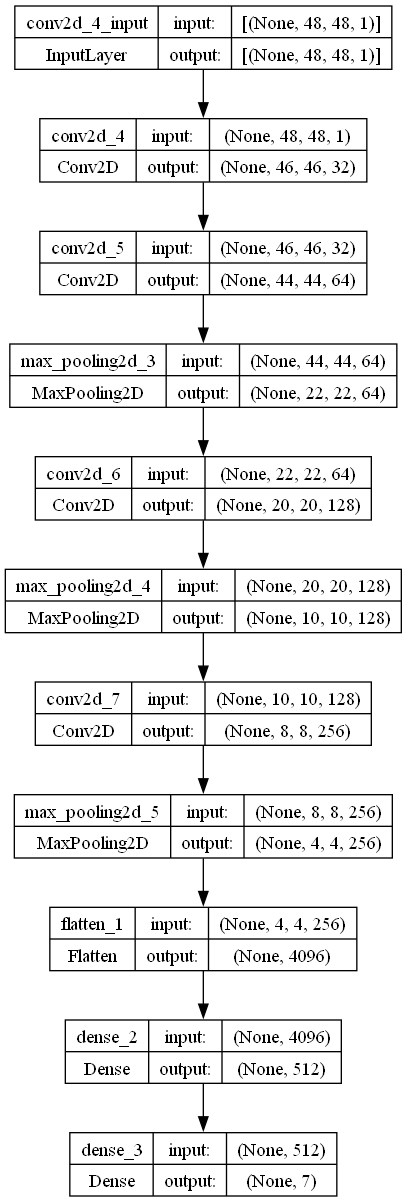

In [59]:
# Visualize the CNN architecture
from keras.utils import plot_model
plot_model(model, to_file='cnn_architecture.png', show_shapes=True, show_layer_names=True)

Below is the code for visualizing intermediate features of Conv1, Conv2, Conv3, and Conv4 layers. 

In [218]:
import os
import numpy as np
from keras.preprocessing import image
from keras.models import Model, load_model
import matplotlib.pyplot as plt
from keras.applications.vgg16 import preprocess_input
from keras import backend as K

In [219]:
# Load the pre-trained model
my_model = load_model('emotion_detection_model_epoch5.h5')

In [220]:
base_path = 'test'

In [221]:
# Specify the emotion folder for which you want to visualize the feature maps
emotion_folder = 'Happy'  # Replace with the emotion folder you are interested in


In [222]:
# Path to the specific emotion folder
emotion_path = os.path.join(base_path, emotion_folder)

In [223]:
#layer_names = ['Conv1', 'Conv2', 'Conv3', 'Conv4']


In [224]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [225]:
# Create a model that outputs the activations of the selected layers
layer_outputs = [my_model.get_layer('conv2d').output,
                 my_model.get_layer('conv2d_1').output,
                 my_model.get_layer('conv2d_2').output,
                 my_model.get_layer('conv2d_3').output]

In [226]:
activation_model = Model(inputs=my_model.input, outputs=layer_outputs)

In [227]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [228]:
# Generate a batch of images
test_img, _ = validation_generator.__next__()

In [229]:
# Get activations for each convolutional layer
activations =activation_model.predict(test_img)

1/1 [==============================] - 0s 109ms/step


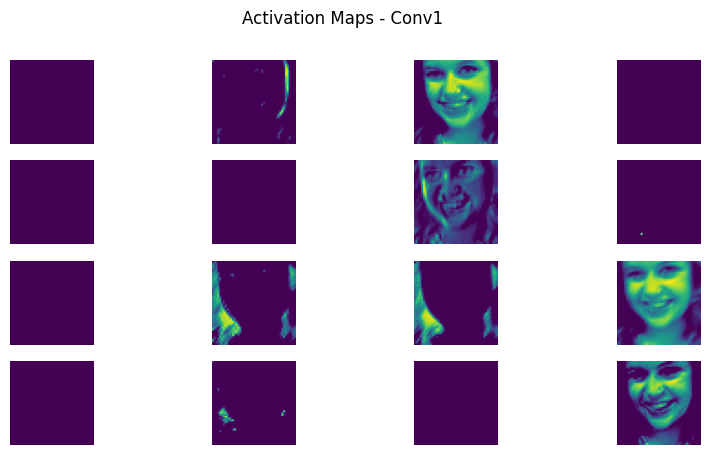

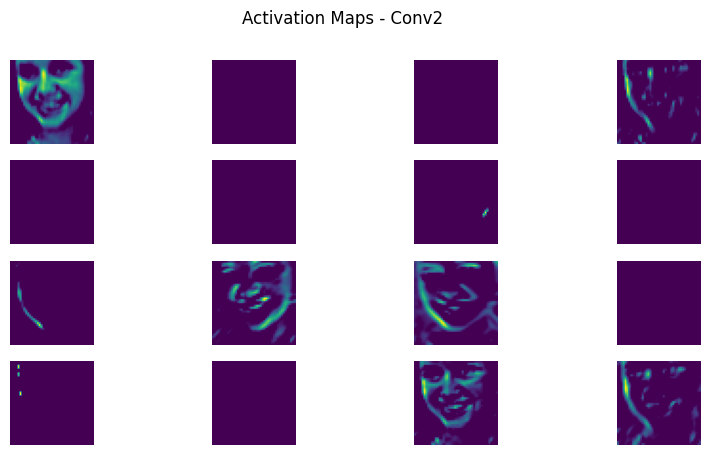

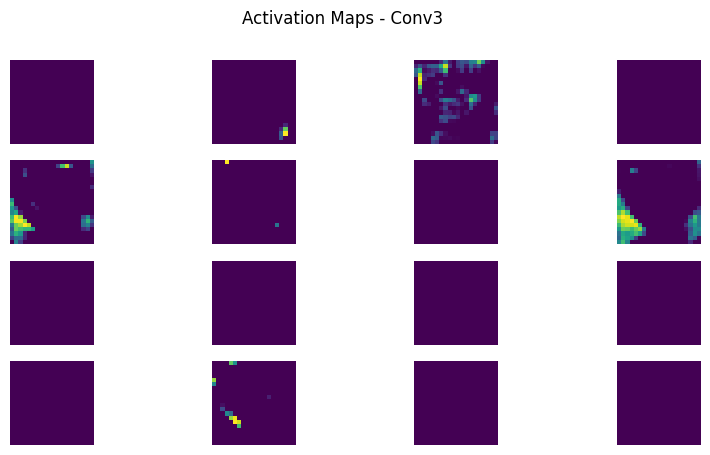

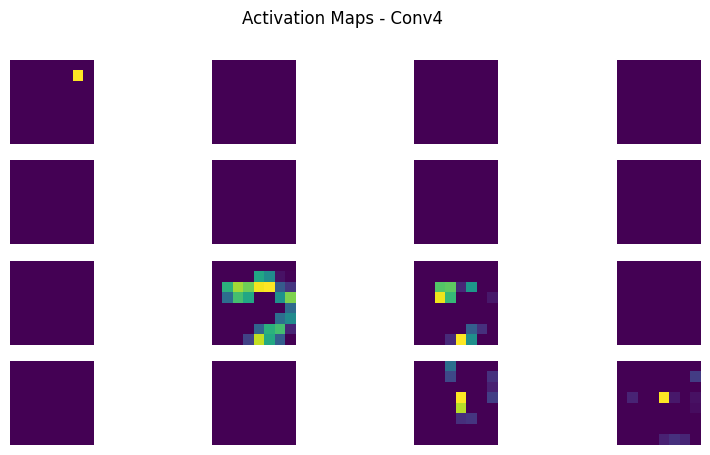

In [230]:
# Visualize activations for each layer
for i, activation in enumerate(activations):
    plt.figure(figsize=(10, 5))
    for j in range(16):  # Display 16 filters
        plt.subplot(4, 4, j+1)
        plt.imshow(activation[0, :, :, j], cmap='viridis')  # Choose a filter to visualize
        plt.axis('off')
    plt.suptitle(f'Activation Maps - Conv{i+1}')
    plt.show()

We can see that our model focuses on important aspects of the image i.e., lips, eye